In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from keras.models import load_model

In [2]:
model = load_model('model_vgg16_2.h5')

In [3]:
class_names = ['Car', 'Bike']

In [4]:
img_folder = 'E:/TEKNIK INFORMATIKA/Semester 6/Deep Learning/Tugas Classifikasi Mobil dan Motor/Gambar/'

In [5]:
img_files = os.listdir(img_folder)

In [6]:
img_files = np.random.choice(img_files, size=1, replace=False)

1/1 [==============================] - 1s 539ms/step


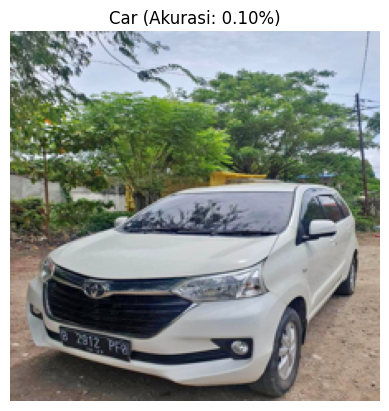

In [7]:
for img_file in img_files:

    img_path = os.path.join(img_folder, img_file)
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    if prediction[0][0] > prediction[0][1]:
        label = 'Car'
        accuracy = prediction[0][0] * 100
    else:
        label = 'Bike'
        accuracy = prediction[0][1] * 100

    plt.imshow(img_array[0,:,:,:])
    plt.title(label + " (Akurasi: {:.2f}%)".format(accuracy))
    plt.axis('off')
    plt.show()